In [17]:
import os
path = os.getcwd()
path = path.split('interactions', 1)[0] + 'interactions'
print(path)

/home/julia/Desktop/uni/enhancer-promoter-interactions


####  Cicero results obtained from neuron cells
All cell types:  
'Amnioserosa', 'Amnioserosa anlage', 'Blastoderm', 'Brain', 'Brain prim.', 'Ectoderm anlage', 'Endoderm anlage', 'Epidermis', 'Epidermis prim.', 'Fat body', 'Foregut prim.', 'Germ cell', 'Glia', 'Head ectoderm', 'Head ectoderm prim.', 'Hindgut', 'Hindgut prim.', 'Malpighian tubule', 'Mesectoderm anlage', 'Mesoderm anlage', 'Midgut', 'Midgut prim.', 'Muscle prim.', 'Neural', 'PNS & sense', 'Pharnyx', 'Plasmatocytes', 'Proventriculus', 'Salivary gland', 'Somatic muscle', 'Tracheal system', 'Tracheal system prim.', 'Unknown', 'Ventral midline', 'Ventral nerve cord', 'Ventral nerve cord prim.', 'Visceral muscle', 'Yolk'

Glia:
  Glia

Neurons:
  Neural
  PNS & sense
  Ventral midline
  Ventral nerve cord

Neuroblasts:
  Brain
  Brain prim.
  Ectoderm anlage
  Mesectoderm anlage
  Ventral nerve cord prim.


In [18]:
types = ['Endoderm anlage', 'Tracheal system', 'Blastoderm', 'Proventriculus', 'Muscle prim.', 'Mesoderm anlage', 'PNS & sense', 'Malpighian tubule', 'Head ectoderm prim.', 'Ventral midline', 'Epidermis prim.', 'Germ cell', 'Hindgut prim.', 'Unknown', 'Plasmatocytes', 'Mesectoderm anlage', 'Ventral nerve cord', 'Neural', 'Head ectoderm', 'Brain', 'Salivary gland', 'Ectoderm anlage', 'Somatic muscle', 'Ventral nerve cord prim.', 'Pharnyx', 'Glia', 'Yolk', 'Midgut prim.', 'Hindgut', 'Visceral muscle', 'Fat body', 'Foregut prim.', 'Tracheal system prim.', 'Amnioserosa anlage', 'Amnioserosa', 'Epidermis', 'Midgut', 'Brain prim.']
types.sort()
print(types)

['Amnioserosa', 'Amnioserosa anlage', 'Blastoderm', 'Brain', 'Brain prim.', 'Ectoderm anlage', 'Endoderm anlage', 'Epidermis', 'Epidermis prim.', 'Fat body', 'Foregut prim.', 'Germ cell', 'Glia', 'Head ectoderm', 'Head ectoderm prim.', 'Hindgut', 'Hindgut prim.', 'Malpighian tubule', 'Mesectoderm anlage', 'Mesoderm anlage', 'Midgut', 'Midgut prim.', 'Muscle prim.', 'Neural', 'PNS & sense', 'Pharnyx', 'Plasmatocytes', 'Proventriculus', 'Salivary gland', 'Somatic muscle', 'Tracheal system', 'Tracheal system prim.', 'Unknown', 'Ventral midline', 'Ventral nerve cord', 'Ventral nerve cord prim.', 'Visceral muscle', 'Yolk']


In [34]:
import pandas as pd

bed = pd.read_csv(path+'/results/calderon/links_calderon_neuroblasts.bedpe', delimiter='\t', header=None)
bed.columns = ['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2', 'x', 'score', 'y', 'z', 'color']
print(bed.shape)
print(bed['chr1'].unique())
print(bed[bed.isna().any(axis=1)])
bed = bed.dropna()

bed['x'].replace('.', 0, inplace=True)
bed['y'].replace('.', 0, inplace=True)
bed['z'].replace('.', 0, inplace=True)
print(sum(bed['x']), sum(bed['y']), sum(bed['z']))
bed.drop(['x', 'y', 'z'], axis=1, inplace=True)
cicero_conns = bed.copy()
print(sum(cicero_conns['chr1'] != cicero_conns['chr2']))
cicero_conns = cicero_conns.drop('chr2', axis=1)
cicero_conns = cicero_conns.rename(columns={'chr1': 'chr'})
cicero_conns['chr'] = cicero_conns['chr'].apply(lambda x: x[3:])
#cicero_conns.to_csv(path+'/results/whole_data/cicero_conns.csv')
cicero_conns.head()

(15644068, 11)
['chr2L' 'chr2R' 'chr3L' 'chr3R' 'chr4' 'chrX' 'chrY']
Empty DataFrame
Columns: [chr1, start1, end1, chr2, start2, end2, x, score, y, z, color]
Index: []
0 0 0
0


,chr,start1,end1,start2,end2,score,color
0,2L,10002429,10002593,9949789,9950017,0.007399,"0,0,255"
1,2L,10002429,10002593,9950665,9950994,0.012957,"0,0,255"
2,2L,10002429,10002593,9951801,9951952,0.007431,"0,0,255"
3,2L,10002429,10002593,9952220,9952371,0.007574,"0,0,255"
4,2L,10002429,10002593,9953858,9954051,0.008835,"0,0,255"


In [35]:
max(cicero_conns['start1'] - cicero_conns['end2'])

99991

In [36]:
chromatin_loops = pd.read_csv(path+'/data/muszka/long_and_short_range_loops_D_mel.tsv')
chromatin_loops.head()

,chr1,x1,x2,chr2,y1,y2,color,x,y,own_loop_no,...,Dmel_OregonR_WT_14-16h_Glia,Dmel_OregonR_WT_14-16h_Neuroblasts,Dmel_OregonR_WT_14-16h_Neurons,Dmel_OregonR_WT_10-12h_Neurons,Dmel_OregonR_WT_10-12h_Neuroblasts,Dmel_OregonR_WT_10-12h_Glia,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_w1118_WT_larva_brain
0,2L,395670,395790,2L,17260794,17260893,"85,107,47",0.395730,17.260844,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2L,395670,395790,2L,17328015,17328118,"85,107,47",0.395730,17.328066,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2L,918896,918995,2L,2595491,2595585,"85,107,47",0.918945,2.595538,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2L,921771,922766,2L,2612166,2612266,"85,107,47",0.922269,2.612216,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2L,921771,922766,2L,2677575,2677786,"85,107,47",0.922269,2.677681,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
chromatin_loops.rename(columns={'chr1': 'chr', 'x1': 'start1', 'x2': 'end1', 'y1': 'start2', 'y2': 'end2'}, inplace=True)
chromatin_loops.head(10)

,chr,start1,end1,chr2,start2,end2,color,x,y,own_loop_no,...,Dmel_OregonR_WT_14-16h_Glia,Dmel_OregonR_WT_14-16h_Neuroblasts,Dmel_OregonR_WT_14-16h_Neurons,Dmel_OregonR_WT_10-12h_Neurons,Dmel_OregonR_WT_10-12h_Neuroblasts,Dmel_OregonR_WT_10-12h_Glia,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_w1118_WT_larva_brain
0,2L,395670,395790,2L,17260794,17260893,"85,107,47",0.395730,17.260844,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2L,395670,395790,2L,17328015,17328118,"85,107,47",0.395730,17.328066,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2L,918896,918995,2L,2595491,2595585,"85,107,47",0.918945,2.595538,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2L,921771,922766,2L,2612166,2612266,"85,107,47",0.922269,2.612216,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2L,921771,922766,2L,2677575,2677786,"85,107,47",0.922269,2.677681,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2L,1080470,1085470,2L,1099460,1105170,NaN,1.082970,1.102315,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2L,1252000,1261000,2L,1341000,1352000,"0,0,255",1.256500,1.346500,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,2L,1416000,1428000,2L,1456000,1467000,"0,0,255",1.422000,1.461500,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
8,2L,1615210,1620490,2L,1647980,1652790,NaN,1.617850,1.650385,2.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2L,1953230,1956920,2L,1969270,1971540,NaN,1.955075,1.970405,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [38]:
range_extend = 50
for col in ['start1', 'start2']:
    chromatin_loops.loc[:,'range_'+ col] = chromatin_loops.loc[:,col].apply(lambda x: max(0, x - range_extend))

for col in ['end1', 'end2']:
    chromatin_loops.loc[:,'range_' + col] = chromatin_loops.loc[:,col] + range_extend

chromatin_loops.head()

,chr,start1,end1,chr2,start2,end2,color,x,y,own_loop_no,...,Dmel_OregonR_WT_10-12h_Neuroblasts,Dmel_OregonR_WT_10-12h_Glia,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_w1118_WT_larva_brain,range_start1,range_start2,range_end1,range_end2
0,2L,395670,395790,2L,17260794,17260893,"85,107,47",0.395730,17.260844,NaN,...,1.0,0.0,1.0,0.0,0.0,1.0,395620,17260744,395840,17260943
1,2L,395670,395790,2L,17328015,17328118,"85,107,47",0.395730,17.328066,NaN,...,1.0,0.0,1.0,0.0,0.0,1.0,395620,17327965,395840,17328168
2,2L,918896,918995,2L,2595491,2595585,"85,107,47",0.918945,2.595538,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,918846,2595441,919045,2595635
3,2L,921771,922766,2L,2612166,2612266,"85,107,47",0.922269,2.612216,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,921721,2612116,922816,2612316
4,2L,921771,922766,2L,2677575,2677786,"85,107,47",0.922269,2.677681,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,921721,2677525,922816,2677836


In [39]:
#change type to int
chromatin_loops[['start1', 'start2', 'end1', 'end2']] = chromatin_loops[['start1', 'start2', 'end1', 'end2']].astype(int)
cicero_conns[['start1', 'end1', 'start2', 'end2']] = cicero_conns[['start1', 'end1', 'start2', 'end2']].astype(int)

In [40]:
def intersect_intervals(interval1, interval2):
    inter_start = max(interval1[0], interval2[0])
    inter_end = min(interval1[1], interval2[1])
    if inter_start <= inter_end:
        return [inter_start, inter_end]
    else:
        return False

In [41]:
results = {'chr': [], 'intersection1': [], 
                                'intersection2': [],
                                'cicero1': [], 'cicero2': [], 
                                'loop1': [], 'loop2': [], 
                                'cicero_index': [], 'loop_index': [],
                                'score': []}

for chrom in set(cicero_conns['chr']).intersection(set(chromatin_loops['chr'])):
    cicero = cicero_conns[cicero_conns['chr'] == chrom].copy()
    loops = chromatin_loops[chromatin_loops['chr'] == chrom].copy()
    print(chrom)
    cicero['interval1'] = [list(x) for x in zip(cicero['start1'], cicero['end1'])]
    cicero['interval2'] = [list(x) for x in zip(cicero['start2'], cicero['end2'])]

    for l in loops.index:
        loop = loops.loc[l]
        loop_1 = [loop['range_start1'], loop['range_end1']]
        loop_2 = [loop['range_start2'], loop['range_end2']]
        finds1 = cicero[cicero['interval1'].apply(lambda x: intersect_intervals(x, loop_1))!=False]
        finds2 = finds1[finds1['interval2'].apply(lambda x: intersect_intervals(x, loop_2))!=False]
        if finds2.shape[0] != 0: 
            for find in finds2.index:
                results['chr'].append(chrom)
                results['cicero1'].append(finds2.loc[find, 'interval1'])
                results['cicero2'].append(finds2.loc[find, 'interval2'])
                results['intersection1'].append(intersect_intervals(finds2.loc[find, 'interval1'], loop_1))
                results['intersection2'].append(intersect_intervals(finds2.loc[find, 'interval2'], loop_2))
                results['loop1'].append(loop_1)
                results['loop2'].append(loop_2)
                results['cicero_index'].append(find)
                results['loop_index'].append(l)
                results['score'].append(finds2.loc[find, 'score'])

2R
4
X
3L
3R
2L


In [47]:
#save results
results = pd.DataFrame(results)
# results.to_csv(path+'/results/calderon/intersections_cicero_chromatin_loops_neurons_range_ext'+ str(range_extend)+ '.csv')


In [48]:
#results = pd.read_csv(path+'/results/calderon/intersections_cicero_chromatin_loops.csv', index_col=0)
results.head(20)

,chr,intersection1,intersection2,cicero1,cicero2,loop1,loop2,cicero_index,loop_index,score
0,2R,"[6571036, 6571219]","[6610322, 6611389]","[6571036, 6571219]","[6610322, 6611389]","[6570950, 6581050]","[6607950, 6616050]",5435079,110,-0.035419
1,2R,"[6571036, 6571219]","[6611999, 6612173]","[6571036, 6571219]","[6611999, 6612173]","[6570950, 6581050]","[6607950, 6616050]",5435080,110,0.003721
2,2R,"[6571036, 6571219]","[6612220, 6612463]","[6571036, 6571219]","[6612220, 6612463]","[6570950, 6581050]","[6607950, 6616050]",5435081,110,0.028331
3,2R,"[6571036, 6571219]","[6612866, 6613302]","[6571036, 6571219]","[6612866, 6613302]","[6570950, 6581050]","[6607950, 6616050]",5435082,110,-0.082336
4,2R,"[6571036, 6571219]","[6613631, 6613806]","[6571036, 6571219]","[6613631, 6613806]","[6570950, 6581050]","[6607950, 6616050]",5435083,110,-0.015844
5,2R,"[6571036, 6571219]","[6613925, 6614141]","[6571036, 6571219]","[6613925, 6614141]","[6570950, 6581050]","[6607950, 6616050]",5435084,110,-0.012790
6,2R,"[6571326, 6571552]","[6610322, 6611389]","[6571326, 6571552]","[6610322, 6611389]","[6570950, 6581050]","[6607950, 6616050]",5435282,110,-0.043621
7,2R,"[6571326, 6571552]","[6611999, 6612173]","[6571326, 6571552]","[6611999, 6612173]","[6570950, 6581050]","[6607950, 6616050]",5435283,110,0.008283
8,2R,"[6571326, 6571552]","[6612220, 6612463]","[6571326, 6571552]","[6612220, 6612463]","[6570950, 6581050]","[6607950, 6616050]",5435284,110,0.043683
9,2R,"[6571326, 6571552]","[6612866, 6613302]","[6571326, 6571552]","[6612866, 6613302]","[6570950, 6581050]","[6607950, 6616050]",5435285,110,-0.117043


In [49]:
cols_to_str = ['loop1', 'loop2', 'cicero1', 'cicero2', 'intersection1', 'intersection2']
results[cols_to_str]=results[cols_to_str].astype(str)
print(type(results.loc[0, 'loop1']))

<class 'str'>


In [50]:
chromatin_loops['cicero_found'] = False
chromatin_loops['score'] = 0
for row in chromatin_loops.index:
    row_chr = chromatin_loops.loc[row, 'chr']
    row_anchor1 = str([chromatin_loops.loc[row, 'range_start1'], chromatin_loops.loc[row, 'range_end1']])
    row_anchor2 = str([chromatin_loops.loc[row, 'range_start2'], chromatin_loops.loc[row, 'range_end2']])
    found = results[(results['chr'] == row_chr) & (results['loop1'] == row_anchor1) & (results['loop2'] == row_anchor2)]
    if found.shape[0] != 0:
        chromatin_loops.loc[row, 'cicero_found'] = True
        chromatin_loops.loc[row, 'score'] = found[abs(found['score'])== max(abs(found['score']))]['score'].values[0]

In [51]:
chromatin_loops['cicero_found'] = chromatin_loops['cicero_found'].astype(int)
chromatin_loops.head(20)

,chr,start1,end1,chr2,start2,end2,color,x,y,own_loop_no,...,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_w1118_WT_larva_brain,range_start1,range_start2,range_end1,range_end2,cicero_found,score
0,2L,395670,395790,2L,17260794,17260893,"85,107,47",0.395730,17.260844,NaN,...,1.0,0.0,0.0,1.0,395620,17260744,395840,17260943,0,0.000000
1,2L,395670,395790,2L,17328015,17328118,"85,107,47",0.395730,17.328066,NaN,...,1.0,0.0,0.0,1.0,395620,17327965,395840,17328168,0,0.000000
2,2L,918896,918995,2L,2595491,2595585,"85,107,47",0.918945,2.595538,NaN,...,0.0,0.0,0.0,1.0,918846,2595441,919045,2595635,0,0.000000
3,2L,921771,922766,2L,2612166,2612266,"85,107,47",0.922269,2.612216,NaN,...,1.0,1.0,1.0,1.0,921721,2612116,922816,2612316,0,0.000000
4,2L,921771,922766,2L,2677575,2677786,"85,107,47",0.922269,2.677681,NaN,...,1.0,1.0,1.0,1.0,921721,2677525,922816,2677836,0,0.000000
5,2L,1080470,1085470,2L,1099460,1105170,NaN,1.082970,1.102315,1.0,...,0.0,0.0,0.0,0.0,1080420,1099410,1085520,1105220,1,0.011944
6,2L,1252000,1261000,2L,1341000,1352000,"0,0,255",1.256500,1.346500,NaN,...,0.0,1.0,0.0,1.0,1251950,1340950,1261050,1352050,1,0.000000
7,2L,1416000,1428000,2L,1456000,1467000,"0,0,255",1.422000,1.461500,NaN,...,1.0,0.0,1.0,1.0,1415950,1455950,1428050,1467050,1,0.490712
8,2L,1615210,1620490,2L,1647980,1652790,NaN,1.617850,1.650385,2.0,...,0.0,0.0,0.0,1.0,1615160,1647930,1620540,1652840,1,0.218920
9,2L,1953230,1956920,2L,1969270,1971540,NaN,1.955075,1.970405,3.0,...,1.0,0.0,1.0,0.0,1953180,1969220,1956970,1971590,1,0.193127


Dmel_OregonR_WT_6-8h_Neuroblasts
[[144 174]
 [ 36  57]]
Roc-auc score 0.613511868533171


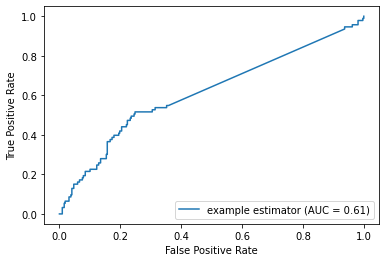

In [52]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

chromatin_loops_cols = ['Dmel_OregonR_WT_6-8h_Neuroblasts']
for col in chromatin_loops_cols:
    print(col)
    data = chromatin_loops[~chromatin_loops[col].isna()].copy()
    print(metrics.confusion_matrix(data[col], data['cicero_found']))
    print('Roc-auc score',metrics.roc_auc_score(data[col], data['score']))

    y = data[col]
    pred = data['score']
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()